# Opals Efficicency Per Game (EPG) with WNBA data included

Explore performance of Opals players.

Previous version only included WNBL data.  This version includes WNBA data for Rebecca Allen and Alanna Smith.
 

In [124]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import wnbl

data_path = "..\\data"

In [125]:
def load_wnba_xlsx(path,name):
    df = pd.read_excel(path)

    df.drop(df.tail(1).index,inplace=True)
    df.insert(0,'Player',name)

    return df

In [126]:
opals_df = wnbl.load_csv(data_path,'opals.csv')

In [127]:
opals_df.head()

,Name,Team,DOB,Height,Position,Comp
0,Rebecca Allen,NY Liberty,6/11/1992,1.85,F,WNBA
1,Sara Blicavs,Southside Flyers,15/02/1993,1.88,F,WNBL
2,Elizabeth Cambage,Southside Flyers,18/08/1991,2.03,C,WNBL
3,Rebecca Cole,Southside Flyers,19/03/1992,1.78,G,WNBL
4,Katie Ebzery,Perth Lynx,8/01/1990,1.78,G,WNBL


In [128]:
# concatenate all teams by season info, drop duplicates to define unique TeamID and name mapping
# select files prefixed with "teams" in "teams" subfolder
teams_df = wnbl.load_csv(os.path.join(data_path,'teams'),'teams')
teams_df = teams_df.drop_duplicates().reset_index()
teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   index   25 non-null     int64 
 1   Team    25 non-null     object
 2   TeamID  25 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 728.0+ bytes


In [129]:
# concatenate all players by season stats
players_df = wnbl.load_csv(os.path.join(data_path,'players'),'players',include_id=True)

# fix html encoded apostrophes iin names
players_df['Player'] = players_df['Player'].str.replace("&#039;","'")
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 0 to 105
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  3004 non-null   object 
 1   G       3004 non-null   int64  
 2   PTS     3004 non-null   int64  
 3   FGA     3004 non-null   int64  
 4   FGM     3004 non-null   int64  
 5   FG%     3004 non-null   float64
 6   3PA     3004 non-null   int64  
 7   3PM     3004 non-null   int64  
 8   3P%     3004 non-null   float64
 9   FTA     3004 non-null   int64  
 10  FTM     3004 non-null   int64  
 11  FT%     3004 non-null   float64
 12  DEF     3004 non-null   int64  
 13  OFF     3004 non-null   int64  
 14  REB     3004 non-null   int64  
 15  AST     3004 non-null   int64  
 16  BLK     3004 non-null   int64  
 17  STL     3004 non-null   int64  
 18  TO      3004 non-null   int64  
 19  TeamID  3004 non-null   int64  
 20  CompID  3004 non-null   int32  
dtypes: float64(3), int32(1), int64(16), ob

In [130]:
# load seasons (maps year to competition)
# seasons_df = pd.read_csv(os.path.join(data_path,'seasons.csv'))
seasons_df = wnbl.load_csv(data_path,'seasons.csv')

# identify current seasons
comp_id = seasons_df['CompID'].max()

In [131]:
seasons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  26 non-null     object
 1   Year    26 non-null     int64 
 2   URL     26 non-null     object
 3   CompID  26 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 960.0+ bytes


In [132]:
print(players_df.shape)
print(seasons_df.shape)
print(teams_df.shape)
print(opals_df.shape)

(3004, 21)
(26, 4)
(25, 3)
(23, 6)


In [133]:
# merge players and seasons so we can plot by date
players_df = players_df.merge(seasons_df,on='CompID',how='left')

In [134]:
players_df = players_df.merge(teams_df,on='TeamID',how='left')
# players_df = players_df.rename(columns={'Team_y':'Team'})

In [135]:
da = wnbl.compute_epg(players_df)

In [136]:
# New features
#da = players_df

# efficiency
#da['EFF'] = da['PTS'] + da['REB'] + da['AST'] + da['STL'] + da['BLK'] - (da['FGA'] - da['FGM']) - (da['3PA'] - da['3PM'])  - (da['FTA'] - da['FTM']) - da['TO']

# efficiency per game
#da['EPG'] = da['EFF'] / da['G']

In [137]:
players_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3004 entries, 0 to 3003
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  3004 non-null   object 
 1   G       3004 non-null   int64  
 2   PTS     3004 non-null   int64  
 3   FGA     3004 non-null   int64  
 4   FGM     3004 non-null   int64  
 5   FG%     3004 non-null   float64
 6   3PA     3004 non-null   int64  
 7   3PM     3004 non-null   int64  
 8   3P%     3004 non-null   float64
 9   FTA     3004 non-null   int64  
 10  FTM     3004 non-null   int64  
 11  FT%     3004 non-null   float64
 12  DEF     3004 non-null   int64  
 13  OFF     3004 non-null   int64  
 14  REB     3004 non-null   int64  
 15  AST     3004 non-null   int64  
 16  BLK     3004 non-null   int64  
 17  STL     3004 non-null   int64  
 18  TO      3004 non-null   int64  
 19  TeamID  3004 non-null   int64  
 20  CompID  3004 non-null   int32  
 21  Season  3004 non-null   object 
 22  

In [138]:
opals_data_df = pd.merge(da,opals_df,left_on='Player',right_on='Name')
opals_data_df.drop(columns=['Name','Team_y'],inplace=True)
opals_data_df.rename(columns={'Team_x':'Team'},inplace=True)
opals_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Player    162 non-null    object 
 1   G         162 non-null    int64  
 2   PTS       162 non-null    int64  
 3   FGA       162 non-null    int64  
 4   FGM       162 non-null    int64  
 5   FG%       162 non-null    float64
 6   3PA       162 non-null    int64  
 7   3PM       162 non-null    int64  
 8   3P%       162 non-null    float64
 9   FTA       162 non-null    int64  
 10  FTM       162 non-null    int64  
 11  FT%       162 non-null    float64
 12  DEF       162 non-null    int64  
 13  OFF       162 non-null    int64  
 14  REB       162 non-null    int64  
 15  AST       162 non-null    int64  
 16  BLK       162 non-null    int64  
 17  STL       162 non-null    int64  
 18  TO        162 non-null    int64  
 19  TeamID    162 non-null    int64  
 20  CompID    162 non-null    int32 

In [139]:
# filter by current season to identify current team for each player
tmp = opals_data_df[['Player','Team','CompID']]

tmp = tmp[tmp['CompID']==comp_id]

# identify current team for these top players
current_teams = tmp[['Player','Team']]


In [140]:
tmp = opals_data_df[['Player','Team','CompID']]

a = tmp.groupby(['Player'], sort=False)['CompID'].max()
a

Player
Darcee Garbin        28356
Cayla George         28356
Tessa Lavey          28356
Sami Whitcomb        18335
Sara Blicavs         28356
Rebecca Allen         1820
Shyla Heal           28356
Katie Ebzery         28356
Kelsey Griffin       28356
Leilani Mitchell     28356
Tess Madgen          28356
Stephanie Talbot     28356
Elizabeth Cambage    28356
Rebecca Cole         28356
Jenna O'Hea          28356
Eziyoda Magbegor     28356
Maddison Rocci       28356
Marianna Tolo        28356
Name: CompID, dtype: int32

Break in wnbl logic here so we can include WNBA data

In [141]:
dWNBA = load_wnba_xlsx("..\\data\\wnba\\alanna_smith.xlsx","Alanna Smith")
dtmp = load_wnba_xlsx("..\\data\\wnba\\rebecca_allen.xlsx","Rebecca Allen")

dWNBA = dWNBA.append(dtmp)

In [142]:
# map WNBA to WNBL columns
column_mappings = {"FT":"FTM","FG":"FGM","3P":"3PM","2P":"2PM","ORB":"OFF","DRB":"DEF","TRB":"REB","TOV":"TO"}
dWNBA.rename(columns=column_mappings,inplace=True)

In [143]:
# multiply stats per game by number of games (inlcuding percentages, for the moment)
dtmp = dWNBA.copy()
dWNBA.iloc[:,6:] = dWNBA.iloc[:,6:].mul(dWNBA["G"],axis=0).round(0)

# put back the original (correct) percentages from our previous copy
dWNBA[["FG%","FT%","2P%","3P%"]] = dtmp[["FG%","FT%","2P%","3P%"]] 

# compute the efficiency per game
dWNBA = wnbl.compute_epg(dWNBA)

In [144]:
# merge player info with WNBA data
wnba_data_df = pd.merge(dWNBA,opals_df,left_on='Player',right_on='Name')

In [145]:
# cleanup column names after merge
wnba_data_df.rename(columns={"Team_y":"Team"},inplace=True)
wnba_data_df.drop(["Team_x"],axis=1,inplace=True)

In [146]:
# update current_teams with WNBA data
wnba_teams = wnba_data_df[["Player","Team","Year"]]
# wnba_teams.groupby(['Player'], sort=False)['Year'].max()

# latest team per player
wnba_teams = wnba_teams.sort_values('Year', ascending=False).drop_duplicates(['Player','Team'])

# drop year to match corresponding wnbl dataframe
wnba_teams.drop(['Year'],axis=1,inplace=True)

current_teams = current_teams.append(wnba_teams)

In [147]:
# merge WNBA and WNBL data
# concatenate current team with player
selected_columns = ['Player','Team','Year','EPG','Position','Height']
tmp = opals_data_df[selected_columns]
tmp2 = wnba_data_df[selected_columns]
tmp = tmp.append(tmp2)

tmp = tmp.merge(current_teams,on='Player')
tmp['Player-Team'] = tmp['Player'] + ' (' + tmp['Team_y'] + ') ' + '\n Pos: ' + tmp['Position'] + ' '+ ' Height: ' + tmp['Height'].astype('str') + ' '


In [148]:
# order player positions
t = pd.CategoricalDtype(categories=['G', 'F','C'], ordered=True)
tmp['sort']=pd.Series(tmp.Position, dtype=t)
tmp.sort_values(by=['sort','Player','Height'],ascending=[True,True,True],ignore_index=True,inplace=True)

In [149]:
# fix type for year
tmp["Year"] = tmp.Year.astype(float)
tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Player       168 non-null    object  
 1   Team_x       168 non-null    object  
 2   Year         168 non-null    float64 
 3   EPG          168 non-null    float64 
 4   Position     168 non-null    object  
 5   Height       168 non-null    float64 
 6   Team_y       168 non-null    object  
 7   Player-Team  168 non-null    object  
 8   sort         168 non-null    category
dtypes: category(1), float64(3), object(5)
memory usage: 10.9+ KB


In [150]:
players_dropped = ['Shyla Heal','Rebecca Cole','Elizabeth Cambage','Maddison Rocci','Darcee Garbin','Kelsey Griffin']
tmp = tmp[~(tmp.Player.isin(players_dropped))]

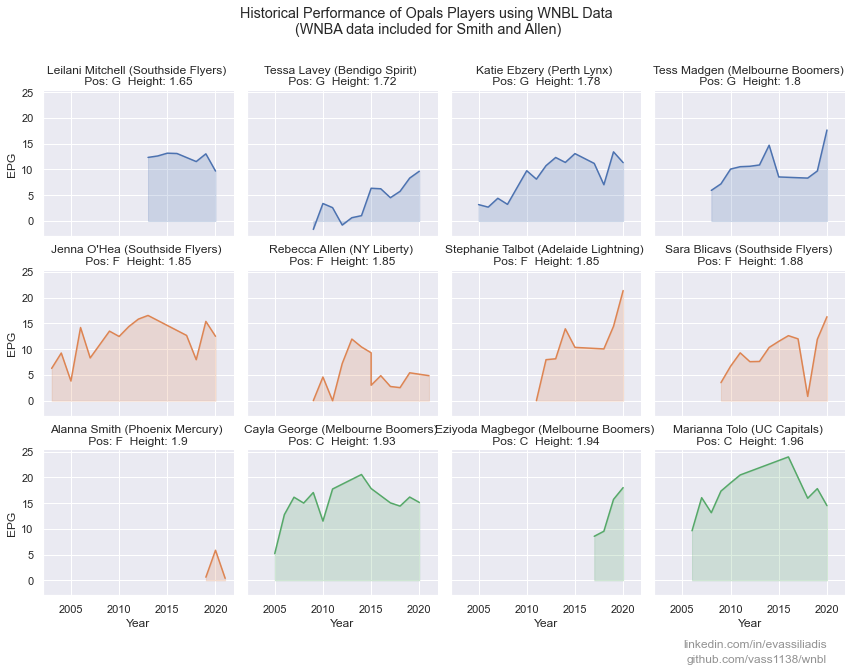

In [151]:
# facet plot of top player historial EPG

# Create a grid : initialize it
g = sns.FacetGrid(tmp.sort_values(by=['sort','Height','Year']), col='Player-Team', hue='Position', col_wrap=4)
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'EPG')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Year', 'EPG', alpha=0.2).set_titles("{col_name} Player-Team")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.85)
sns.set(rc={'figure.figsize':(12,8)})
g = g.fig.suptitle('Historical Performance of Opals Players using WNBL Data\n (WNBA data included for Smith and Allen)')

plt.text(2020,-13,"linkedin.com/in/evassiliadis",ha='right',alpha=0.5)
plt.text(2020,-16,"github.com/vass1138/wnbl",ha='right',alpha=0.5)
plt.savefig('wnbl_wnba_opals_history.png')
plt.show()

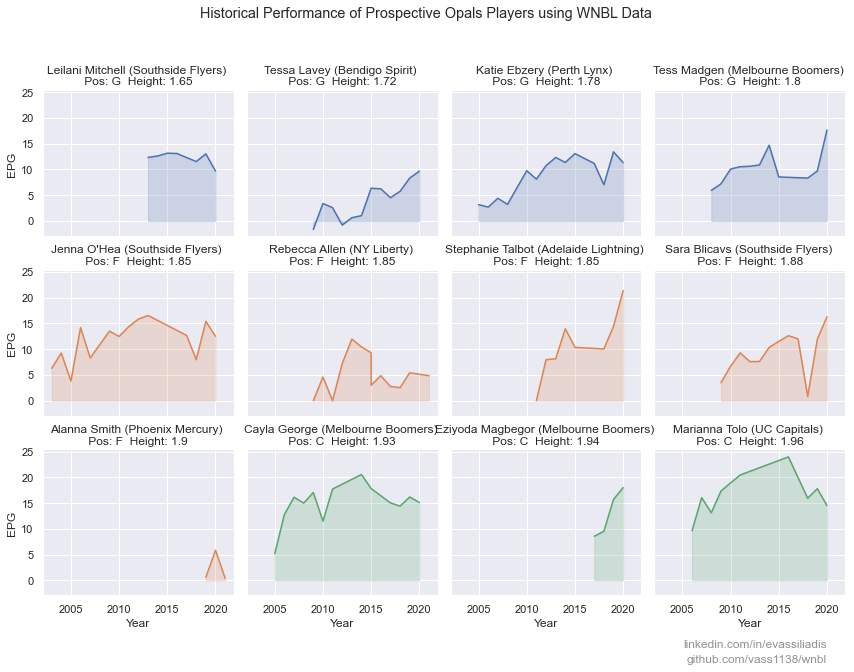

In [156]:
# Repeat for Twitter

# facet plot of top player historial EPG

# Create a grid : initialize it
g = sns.FacetGrid(tmp.sort_values(by=['sort','Height','Year']), col='Player-Team', hue='Position', col_wrap=4)
 
# Add the line over the area with the plot function
g = g.map(plt.plot, 'Year', 'EPG')
 
# Fill the area with fill_between
g = g.map(plt.fill_between, 'Year', 'EPG', alpha=0.2).set_titles("{col_name} Player-Team")
 
# Control the title of each facet
g = g.set_titles("{col_name}")
 
# Add a title for the whole plot
plt.subplots_adjust(top=0.85)
sns.set(rc={'figure.figsize':(12,6)})
g = g.fig.suptitle('Historical Performance of Prospective Opals Players using WNBL Data\n (WNBA data included for Smith and Allen')

plt.text(2020,-13,"linkedin.com/in/evassiliadis",ha='right',alpha=0.5)
plt.text(2020,-16,"github.com/vass1138/wnbl",ha='right',alpha=0.5)
plt.savefig('wnbl_wnba_opals_history_twitter.png')